In [1]:
import json
from pprint import pprint
import tweepy
import pandas as pd
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

target_users = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]
sentiment_dict = {"Target User": [], "Compound Score": [], "Positive Score": [], "Negative Score": [], "Neutral Score": [], "Date & Time": []}

for user in target_users:
    public_tweets = api.user_timeline(user, count=100)
    for tweet in public_tweets:
        sentiment_dict["Target User"].append(user)
        sentiment_analysis = analyzer.polarity_scores(tweet["text"])
        sentiment_dict["Compound Score"].append(sentiment_analysis["compound"])
        sentiment_dict["Positive Score"].append(sentiment_analysis["pos"])
        sentiment_dict["Negative Score"].append(sentiment_analysis["neg"])
        sentiment_dict["Neutral Score"].append(sentiment_analysis["neu"])
        raw_time = tweet["created_at"]
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        sentiment_dict["Date & Time"].append(converted_time)
        
news_df = pd.DataFrame(sentiment_dict, index = range(len(sentiment_dict["Target User"])))
news_df.head()
news_df.to_csv("Outputs/News_Twitter_Sentiment_Scores.csv")
        


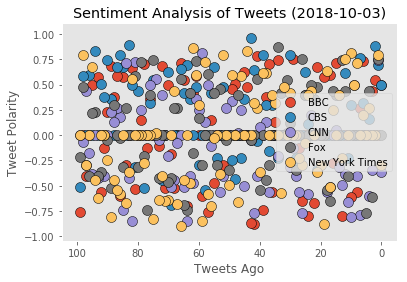

In [7]:
now = datetime.now()
now = now.strftime("%Y-%m-%d")

BBC_df=news_df.loc[news_df["Target User"]=="BBC",:].reset_index(drop=True)
CBS_df=news_df.loc[news_df["Target User"]=="CBS",:].reset_index(drop=True)
CNN_df=news_df.loc[news_df["Target User"]=="CNN",:].reset_index(drop=True)
FoxNews_df=news_df.loc[news_df["Target User"]=="FoxNews",:].reset_index(drop=True)
nytimes_df=news_df.loc[news_df["Target User"]=="nytimes",:].reset_index(drop=True)

plt.scatter(BBC_df.index,BBC_df["Compound Score"],alpha=1, edgecolors="k", s=100,label="BBC")
plt.scatter(CBS_df.index,CBS_df["Compound Score"],alpha=1, edgecolors="k", s=100,label="CBS")
plt.scatter(CNN_df.index,CNN_df["Compound Score"],alpha=1, edgecolors="k", s=100,label="CNN")
plt.scatter(FoxNews_df.index,FoxNews_df["Compound Score"],alpha=1, edgecolors="k", s=100,label="Fox")
plt.scatter(nytimes_df.index,nytimes_df["Compound Score"],alpha=1, edgecolors="k", s=100,label="New York Times")

plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc="right")
plt.xlim(105,-5)
plt.grid()
plt.savefig("Outputs/Sentiments_Scatter.png")
plt.show()

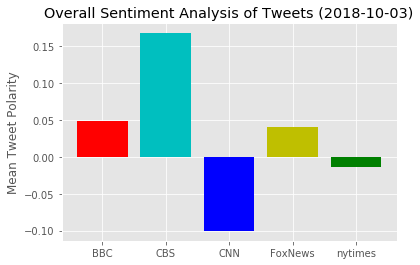

In [10]:
news_df_barchart = news_df.groupby("Target User").mean()

plt.bar(news_df_barchart.index,news_df_barchart["Compound Score"], color=['r','c','b','y','g'])
plt.title(f"Overall Sentiment Analysis of Tweets ({now})")
plt.ylabel("Mean Tweet Polarity")
plt.savefig("Outputs/Sentiments_Bar.png")
plt.show()